# 02.03. Bardziej zaawansowany przykład Django (analiza danych)

_hic sunt dracones_

![hic_sunt_dracones](images/hic_sunt_dracones.png)

Wkraczamy na niebezpieczne terytorium. Tutaj przetrwają tylko najsilniejsi (czyli my).


## Cel na ten Nobook

Żeby zrozumieć co będzie się działo posłużmy się może praktycznym przykładem.

Znów używamy naszej największej przewagi ewolucyjnej (wyobraźni) i stawiamy się w następującej problematycznej sytuacji:

Jesteśmy naukowcem, emporystą z krwi i kości. Czego potrzebujemy, aby nasze teorie miały oparcie w rzeczywistości? Eksperymentu oczywiście! Bo czy nie tym właśnie naukowcy się nie zajmują, nie przeprowadzają eksperymentów (chociażby myślowych), które mają na celu sprawdzenie jakiejś konkretnej teorii? Ale do tematu:

> In science, experiment without theory is blind, but theory without experiment is empty.

_Paul Thagard, 2007, Artificial Intelligence_

### Przykład klasyczny, acz zazwyczaj-nie-ma-czasu-aby-go-przytaczać

![galton](images/galton.jpg)

_Kto zna tego pana?_

Bardzo pouczający przykład, na który nie ma czasu i miejsca gdzie indziej w programie (bo znajdują się w nim już ważniejsze i może bardziej odpowiednie przykłady) dotyczny dokonań Pana, którego zdjęcie widzimy powyżej. [Całość tutaj](https://amstat.tandfonline.com/doi/full/10.1080/10691898.2001.11910537#), skrót w kolejnych zdaniach.

Wracjąc do wyobraźni: żyjemy w XIX-wiecznej Anglii, w największym imperium jakie widział świat u szczytu potęgi tegoż właśnie imperium. Naszym kuzynem jest sam Charles Robert Darwin. Tak się składa, że my również przysłużymy się nauce. W jaki sposób? Otóż położymy podwaliny konceptualne pod analizę regresji i korelację. _Shall we?_

Obserwujemy pewne zjawisko zachodzące w świecie, a mianowicie dziedziczenie cech. Jedna ze składowych życia. Pokolenia zstępujące przekazują pewne cechy pokoleniom wstępującym. W tym momencie rodzą się dwa pytania:
 1. Czy rzeczywiście tak jest? Być może tak się nam po prostu wydaje?
 2. Jeśli tak rzeczywiście jest, jaka jest siła tego oddziaływania (dziedziczności)?

Ciekawość nie daje nam spokoju, bierzemy się zatem do pracy. Potrzebujemy jakiegoś obiektu badawczego. Weźmy groszek, pachnący ( _lathyrus latifolius_ ). (Ciekawostka: jak pamiętamy, groszek [zwyczajny co prawda, ale zawsze groszek, ta sama rodzina, _fabaceae_ ] już raz był przyczynił się do rozwoju nauki, ale to nie był główny powód, dlaczego wybraliśmy akurat groszek.)

![sweet_pea](images/sweet_pea.jpg)

W tym momencie stosujemy następującą procedurę:
 1. Mierzymy wielkość nasion pokolenia _N_ (zstępującego, rodziców)
 2. Siejemy te nasionka, czekamy aż wyrośnie z nich nowy groszek
 3. Mierzymy wielkość nasion pokolenia _N+1_ (wstępującego, potomków, dzieci)

Mamy więc pewien obraz _dziedziczenia_ pewniej _cechy_.

Co zrobimy teraz, aby objąć nasz problem _konceptualnie_ ? Otóż rysujemy wykres, na którym na jednej osi mamy cechy "rodziców", a na drugiej "potomstwa" (jak w przykładzie poniżej, z artykułu podlinkowanego wcześniej):

![regression](images/regression.jpg)

### Trochę techniki

W tym momencie się zatrzymajmy. Weźmy przykład danych, na którym działaliśmy (**Uwaga** w tym miejscu w celach dydaktycznych odbiegamy od oryginalnych danych). Wczytajmy przykładowe dane:

In [1]:
import pandas as pd

df = pd.read_csv('data/Galton_pea.csv')
df

,Diameter of Parent Seed (0.01 inch),Diameter of Daughter Seed (0.01 inch)
0,23.0,27.1
1,33.7,44.1
2,27.8,44.1
3,31.5,47.9
4,29.9,45.5
...,...,...
195,44.4,45.1
196,30.5,22.9
197,33.0,28.3
198,32.9,21.5


In [2]:
df.describe()

,Diameter of Parent Seed (0.01 inch),Diameter of Daughter Seed (0.01 inch)
count,200.000000,200.000000
mean,32.105000,40.044000
std,8.247313,9.080265
min,10.300000,13.100000
25%,27.250000,34.400000
50%,32.250000,40.950000
75%,38.050000,45.425000
max,53.400000,62.700000


Jak narysować regresję w Pythonie? Na przykład tak ([źródło](https://raphaelvallat.com/correlation.html)):

In [3]:
# Importy muszą być osobno
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

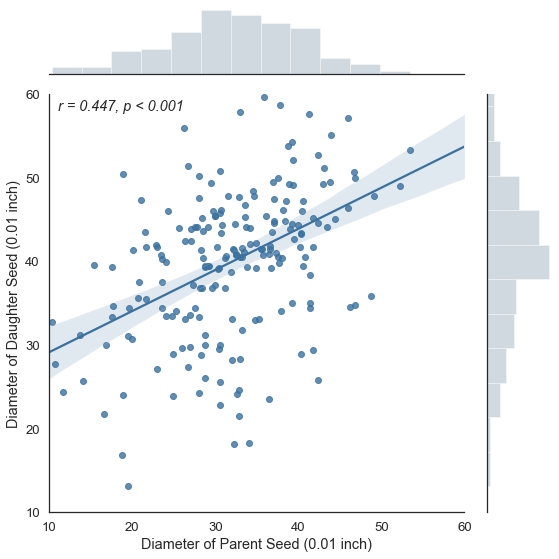

In [4]:
sns.set(style='white', font_scale=1.2)

r, p = pearsonr(df['Diameter of Parent Seed (0.01 inch)'], df['Diameter of Daughter Seed (0.01 inch)'])
# Prevent p=0.000
if p < 0.001:
    p = 0.001

g = sns.JointGrid(data=df,
                  x='Diameter of Parent Seed (0.01 inch)',
                  y='Diameter of Daughter Seed (0.01 inch)',
                  xlim=(10, 60),
                  ylim=(10, 60), height=8)
g = g.plot_joint(sns.regplot, color="xkcd:muted blue")
g = g.plot_marginals(sns.distplot, kde=False, bins=12, color="xkcd:bluey grey")
g.ax_joint.text(11, 58, 'r = %.03f, p < %.03f' % (r, p), fontstyle='italic')
plt.tight_layout()

Możemy również wyliczyć korelację za pomocą funkcji w Pandach (dokumentacja [tutaj](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html)):

In [5]:
df.corr(method="pearson")

,Diameter of Parent Seed (0.01 inch),Diameter of Daughter Seed (0.01 inch)
Diameter of Parent Seed (0.01 inch),1.000000,0.446965
Diameter of Daughter Seed (0.01 inch),0.446965,1.000000


Na potrzeby bardziej zautomatyzowanego przetwarzania następujący sposób wyliczania korelacji krzyżowych będzie bardziej odpowiedni.

In [6]:
def pearson_r_xor_p(x, y, r_xor_p='r'):
    r, p = pearsonr(x, y)
    
    if r_xor_p == 'r':
        return r
    else:
        return p

In [7]:
print('r table')
df.apply(lambda x: df.apply(lambda y: pearson_r_xor_p(x, y, r_xor_p='r')))

r table


,Diameter of Parent Seed (0.01 inch),Diameter of Daughter Seed (0.01 inch)
Diameter of Parent Seed (0.01 inch),1.000000,0.446965
Diameter of Daughter Seed (0.01 inch),0.446965,1.000000


In [8]:
print('p table')
df.apply(lambda x: df.apply(lambda y: pearson_r_xor_p(x, y, r_xor_p='p')))

p table


,Diameter of Parent Seed (0.01 inch),Diameter of Daughter Seed (0.01 inch)
Diameter of Parent Seed (0.01 inch),0.000000e+00,3.253278e-11
Diameter of Daughter Seed (0.01 inch),3.253278e-11,0.000000e+00


### Co to ma wszystko wspólnego z KCK?

Otóż wyobraźmy sobie, że jako naukowiec wiemy jak wyliczyć regresję, ale ani nie mamy narzędzia, aby to robić regularnie, ale nie sprawia nam to specjalnej przyjemności. Co byśmy wtedy chcieli? Chcielibyśmy narzędzia, które robi to za nas. Na zasadzie: "dostarczam dane", a następnie: "otrzymuję wyniki" -- statystyki, wizualizacje, itd. I dopiero na tej podstawie wyciągam wnioski ze swojego badania.

Czy można zrobić taką platformę do liczenia danych za pomocą Django? Oczywiście, to właśnie teraz zrobimy.

## Do dzieła!

Może najpierw zobaczmy co chcemy uzyskać na gotowym przykładzie. Używany następujących komend:

```bash
git clone https://github.com/mikbuch/django_data_analysis

cd django_data_analysis

pip install -r requirements.txt

python manage.py migrate

python manage.py runserver
```

Jako zbiory danych używamy naszego (wyimaginowanego) zbiory wielkości ziaren groszków. Znajduje się on w pobranym przez nas repozytorium, w katalogu `data` lub na serwerze [tutaj](https://github.com/mikbuch/hci/blob/master/data/Galton_pea.csv) (lub jako surowy plik [tutaj](https://raw.githubusercontent.com/mikbuch/hci/master/data/Galton_pea.csv)).

Wrzucamy plik na nasz serwer obliczeniowy (jak to dostojnie brzmi) i patrzymy co się dzieje. Jaką korelację wyliczył nasz serwer?

### Ćwiczenie 1: _Inne słynne rośliny_

W 1936 roku ojciec współczesnej statystyki, Roland A. Fisher opublikował artykuł pt. _The use of multiple measurements in taxonomic problems_ , w którym użył danych dotyczących irysów: 150 irysów -- po 50 dla każdego z gatunków tego rodzaju: _Iris setosa_ , _Iris virginica_ and _Iris versicolor_ -- po 4 cechy każdego z gatunków. Przykład wizualizacji tych danych poniżej ([źródło przykładu](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html)).

In [9]:
print(__doc__)


# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

Automatically created module for IPython interactive environment


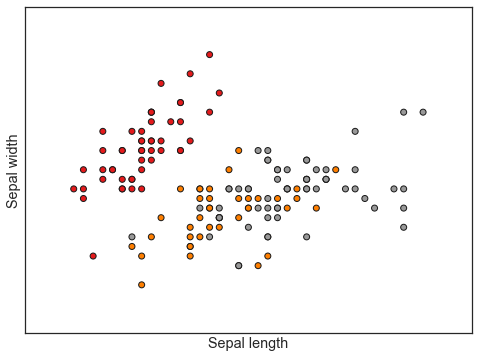

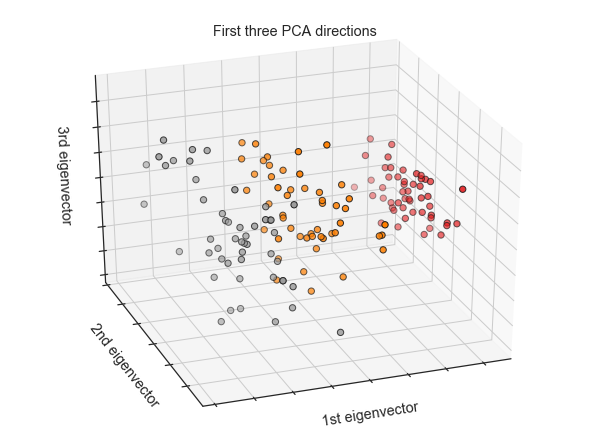

In [10]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target +2

x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1,
            edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

Zadanie na teraz: weź zbiór danych [stąd](https://github.com/mikbuch/hci/blob/master/data/iris.csv) lub [stąd](https://raw.githubusercontent.com/mikbuch/hci/master/data/iris.csv) i załaduj na nasz serwer liczący korelacje. Jakie wyniki otrzymałeś/otrzymałaś?

### Ćwiczenie 2: _Jak istotna jest istotność?_

Zaimplementuj liczenie testu T studenta na serwerze. Wyniki grupy eksperymentalnej mają być w jednej kolumnie, kontrolnej w drugiej, jak w tabeli poniżej:

| Eksperymentalna | Kontrolna |
| --------------- | --------- |
| 1.2             | 0.25      |
| 0.98            | 0.14      |
| 1.15            | 0.34      |
| 1.01            | 0.17      |
| ...             | ...       |